In [32]:
import numpy as np
from sklearn import preprocessing
data = np.array([
[2.1, -1.9, 5.5],
[-1.5, 2.4, 3.5],
[0.5, -7.9, 5.6],
[5.9, 2.3, -5.8]])

bin = preprocessing.Binarizer(threshold = 0.5).transform(data)
bin
sr = data.mean(axis=0)
std= data.std(axis=0)

# PREPROCESSING:
# a) Mean removal:
mean_rem = preprocessing.scale(data).mean(axis = 0)

# b) scaling
scal = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(data)

# c) normalization
# L1 - least absolute deviation - sum of absolute values = 1 in each row
l1 = preprocessing.normalize(data, norm="l1")
# l2 - sum of square values = 1 in each row
l2 = preprocessing.normalize(data, norm="l2")

# d) label encoding - transforming word labels into numerical form - w kolejnosci alfabetycznej
label = ['red','black','red','green','black','yellow','white']
encoder = preprocessing.LabelEncoder()
encoder.fit(label)
test_labels = ['green','red','black'] 
encoder_test = encoder.transform(test_labels)
encoded_values = [3,0,4,1]
decoded_list = encoder.inverse_transform(encoded_values)
print(encoder_test, decoded_list)

# SUPERVISED ML:
#  SVM = support vector machines, liczba features = liczbie wymiarow = liczbie co-ordinates (support vectors), classifier - linia oddzielajaca grupy 
# a) kernel  - funkcje (linear, polynomial, rbf and sigmoid) zwiększające liczbe wymiarow

# Logistic Regression - mierzy relacje miedzy zmiennymi zależnymi i niezależnymi przez oszacowanie prawdopodobieństwa (wystąpnienia zdarzenia) przy użyciu funkcji logistycznej
# zmienne niezależne = features ktore zostana uzyte do oszacowania zm zależnych

# PERFORMANCE METRICS:
# the metric we choose to evaluate our machine learning model is very important 
# because the choice of metrics influences how the performance of a machine learning algorithm is measured and compared.
# confusion matrix - glownie clasyfikacja, where output is two or more types of classes, is not a performance measure as such 
# but almost all the performance matrices are based on the confusion matrix:
# a) accuracy: (TP+TN)/(TP+FP+FN+TN) prawidlowe vs wszystkie
# b) precision: (TP)/(TP+FP) wsrod prawdziwych wynikow ile jest naprawde prawdziwych
# c) recall or sensitivity: (TP)/(TP+FN) ile jest prawdziwych wsrod prawdziwych i tych zle zidentyfikowanych jako falszywe -w rzeczywistosci sa prawdziwe
# d) specificity: (TN)/(TN+FP) ile negatywnych wsrod negatywnych i tych zle zidentyfikowanych jako pozytywne (w rzeczywistosci powinny byc negatywne)

# UNSUPERVISED ML:
# clustering: podzial podobnych obserwacji w podzbiory = clusters
#  a) K-means - liczba clusters znana z gory, z kazda iteracja K-centroid umieszczany jest w optymalnej lokalizacji
# b) mean shift = hierarchical clustering - By repeating the process of updating clusters location, 
# we move closer the peak of cluster i.e. towards the region of higher density.
# CLUSTERING PERFORMANCE METRICS:
# silhouette analysis - measures the distance between the clusters



[1 2 0] ['white' 'black' 'yellow' 'green']


In [42]:
# EXAMPLE - CLASSIFICATION - Naive Bayes, Gaussian model

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
labels = data['target']
features = data['data']
# wazna kolejnosc train, test...
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.4, random_state=42)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train, train_labels)
pred = gnb.predict(test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, test_labels)
accuracy


0.9517543859649122

Text(0.5, 1.0, 'SVC with linear kernel')

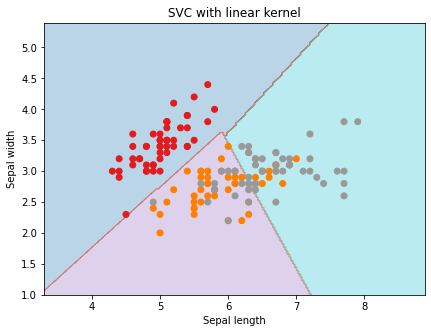

In [59]:
# EXAMPLE SVM - Kernel:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data[:,:2] #[wiersze, kolumny], pobieramy wszystkie wiersze i kolumny 0 oraz 1
y = iris.target

# min i max z pierwszej kolumny X
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# min i max z drugiej kolumny X
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

svc_classifier = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr').fit(X, y)
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

In [84]:
# EXAMPLE - Decision Tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import collections
X=[[165,19],[175,32],[136,35],[174,65],[141,28],[176,15],[131,32],[166,6],[128,32],[179,10],[136,34],[186,2],[126,25],[176,28],[112,38],[169,9],[171,36],[116,25],[196,25]]
Y = ['Man','Woman','Woman','Man','Woman','Man','Woman','Man','Woman','Man','Woman','Man','Woman','Woman','Woman','Man','Woman','Woman','Man']
data_feature_names = ['height','length of hair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=5)

clf = DecisionTreeClassifier()
clf = clf.fit(X,Y) #??? dlaczego nie X_test, Y_test??

prediction = clf.predict([[133,37]])
print(prediction)


# EXAMPLE - Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=50, random_state=0)
forest.fit(X_train,y_train)

print(forest.score(X_train,y_train), forest.score(X_test,y_test))


['Woman']
1.0 0.965034965034965


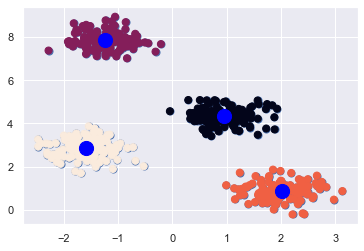

In [101]:
# EXAMPLE CLUSTERING K-MEANS
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
#  X dwie kolumny danych, y_true - array z liczbami 0,1,2,3
X, y_true = make_blobs(n_samples=500, centers=4,
cluster_std=0.40, random_state=0)
plt.scatter(X[:,0], X[:, 1], s=50)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:,0], X[:, 1], s=50, c=y_kmeans)
centers = kmeans.cluster_centers_ #tablica z dwoma kolumnami dla wspolrzednych x i y na osi
plt.scatter(centers[:,0], centers[:, 1], s=200, c='blue')
plt.show()

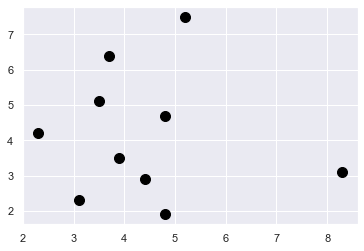

In [103]:
# EXAMPLE NEAREST NEIGHBORS:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
A = np.array([[3.1, 2.3], [2.3, 4.2], [3.9, 3.5], [3.7, 6.4], [4.8, 1.9],[8.3, 3.1], [5.2, 7.5], [4.8, 4.7], [3.5, 5.1], [4.4, 2.9],])
plt.scatter(A[:,0], A[:,1], marker='o', s=100, color='black')
knn_model = NearestNeighbors(n_neighbors=3, algorithm='auto').fit(A)




In [106]:
%%writefile experiment_env.yml
name: experiment_env
dependencies:
  # The python interpreter version.
  # Currently Azure ML only supports 3.5.2 and later.
- python=3.6.2
- scikit-learn
- ipykernel
- matplotlib
- pandas
- pip
- pip:
  - azureml-defaults
  - pyarrow

Writing experiment_env.yml


In [2]:
import pyspark
sc = pyspark.SparkContext('local[*]')

txt = sc.textFile('file:////usr/share/doc/python/copyright')
print(txt.count())

python_lines = txt.filter(lambda line: 'python' in line.lower())
print(python_lines.count())

ModuleNotFoundError: No module named 'pyspark'